# FOOTBALL WIN PREDICTOR (Europe) 


Build a classifier model that can predict the result for a given football match. The result can be win for the home team, loss for the home team or draw.


In [2]:
# importing essenteial libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
conn = sqlite3.connect("E:\\Machine Learning projects\\Football predictor\\database.sqlite")

Creating pandas dataframes using sql queries 

In [4]:
Country = pd.read_sql_query("SELECT * FROM Country", conn)
League = pd.read_sql_query("SELECT * FROM League", conn)
Match = pd.read_sql_query("SELECT * FROM Match", conn)
Player = pd.read_sql_query("SELECT * FROM Player", conn)
Player_Attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
Team = pd.read_sql_query("SELECT * FROM Team", conn)
Team_Attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)

In [5]:
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [6]:
Country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [7]:
League

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [8]:
Player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [9]:
Player_Attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [10]:
Team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [11]:
Team_Attributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [12]:
Match['Result'] = Match['home_team_goal'] - Match['away_team_goal']   #Draw
Match['Result'][Match['Result'] > 0 ] = 1                           #Home Win
Match['Result'][Match['Result'] < 0] = -1                           #Home Loss

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Result
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,0
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,-1
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,-1


# Data Preprocessing

In this step the stage column, that is useless to us, has been replaced by the year that the match was played and renamed 'date_year' and the 'date' column has the full date. The Match dataframe has been sorted by year. This will be useful going forward to split the matches and to merge player and team attributes.

The date columns in the player and team attribute date frames have also been converted to pandas 'datetime'.

In [14]:
Match['stage'] = pd.to_datetime(Match['date']).dt.year
Match = Match.rename(columns={'stage': 'date_year_fin'})
Match['date'] = pd.to_datetime(Match['date'])

Player_Attributes['date']= pd.to_datetime(Player_Attributes['date']).dt.year 
Team_Attributes['date']= pd.to_datetime(Team_Attributes['date']).dt.year 

#Sort Match table by date:
Match = Match.sort_values(by='date',ascending = True)

Match.head()

,id,country_id,league_id,season,date_year_fin,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Result
24558,24559,24558,24558,2008/2009,2008,2008-07-18,486263,10192,9931,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
24559,24560,24558,24558,2008/2009,2008,2008-07-19,486264,9930,10179,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
24560,24561,24558,24558,2008/2009,2008,2008-07-20,486265,10199,9824,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
24561,24562,24558,24558,2008/2009,2008,2008-07-20,486266,7955,10243,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
24613,24614,24558,24558,2008/2009,2008,2008-07-23,486268,6493,7955,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


## Feature Creation

#### Team Form
We add the result of the team's previous 10 games. The sum gives us an idea about the team's overall form.


In [15]:
#For home team
def form_home_team(df):
    team = df['home_team_api_id']
    date = df['date']
    team_matches = Match[(Match['home_team_api_id'] == team) | (Match['away_team_api_id'] == team)]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:10,:]
    score = last_matches['Result'].sum()
    return score

#For away team
def form_away_team(df):
    team = df['away_team_api_id']
    date = df['date']
    team_matches = Match[(Match['home_team_api_id'] == team) | (Match['away_team_api_id'] == team)]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:10,:]
    score = last_matches['Result'].sum()
    return score

In [16]:
Match['form_home_team'] = Match.apply(lambda x: form_home_team(x),axis=1 )
Match['form_away_team'] = Match.apply(lambda x: form_away_team(x),axis=1 )

#### Attacking form 
We calculate the number of goals scored by a team in it's last 10 games.

In [17]:
def goals(df,team):
    home_goals = int(df['home_team_goal'][df['home_team_api_id'] == team].sum())
    away_goals = int(df['away_team_goal'][df['away_team_api_id'] == team].sum())
    total_goals = home_goals + away_goals
    return total_goals

def Home_Team_Goal_Scoring_Form (df):
    team = df['home_team_api_id']
    date = df['date']
    team_matches = Match[(Match['home_team_api_id'] == team) | (Match['away_team_api_id'] == team)]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:10,:]
    return goals(last_matches,team)
    
def Away_Team_Goal_Scoring_Form (df):
    team = df['away_team_api_id']
    date = df['date']
    team_matches = Match[(Match['home_team_api_id'] == team) | (Match['away_team_api_id'] == team)]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:10,:]
    return goals(last_matches,team)

Match['Home_Team_Attack_Form'] = Match.apply(lambda x: Home_Team_Goal_Scoring_Form(x),axis=1 )
Match['Away_Team_Attack_Form'] = Match.apply(lambda x: Away_Team_Goal_Scoring_Form(x),axis=1 )

#### Defensive Form
We calculate the number of goals conceded by a team in it's last 10 games.

In [18]:
def goals_conceded(df, team):
    home_goals_conceded = int(df['away_team_goal'][df['home_team_api_id'] == team].sum())
    away_goals_conceded = int(df['home_team_goal'][df['away_team_api_id'] == team].sum())
    total_goals_conceded = home_goals_conceded + away_goals_conceded
    return total_goals_conceded

def Home_Team_Defensive_Form (df):
    team = df['home_team_api_id']
    date = df['date']
    team_matches = Match[(Match['home_team_api_id'] == team) | (Match['away_team_api_id'] == team)]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:10,:]
    return goals_conceded(last_matches,team)
    
#Away Team Defensive Form 
def Away_Team_Defensive_Form (df):
    team = df['away_team_api_id']
    date = df['date']
    team_matches = Match[(Match['home_team_api_id'] == team) | (Match['away_team_api_id'] == team)]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:10,:]
    return goals_conceded(last_matches,team)

Match['Home_Team_Defensive_Form'] = Match.apply(lambda x: Home_Team_Defensive_Form(x),axis=1 )
Match['Away_Team_Defensive_Form'] = Match.apply(lambda x: Away_Team_Defensive_Form(x),axis=1 )

#### Head to head
The record of the previous 4 games played between these teams.

In [19]:
def Head_to_Head (df):
    team1 = df['home_team_api_id']
    team2 = df['away_team_api_id']
    date = df['date']
    team_matches = Match[((Match['home_team_api_id'] == team1) & (Match['away_team_api_id'] == team2))|\
     ((Match['home_team_api_id'] == team2) & (Match['away_team_api_id'] == team1))]
    last_matches = team_matches[team_matches['date'] < date ].sort_values(by = 'date', ascending = False).iloc[0:4,:]
    score = last_matches['Result'].sum()
    return score

Match['Head_to_Head'] = Match.apply(lambda x: Head_to_Head(x),axis=1 )

In [20]:
Match.tail()

,id,country_id,league_id,season,date_year_fin,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Result,form_home_team,form_away_team,Home_Team_Attack_Form,Away_Team_Attack_Form,Home_Team_Defensive_Form,Away_Team_Defensive_Form,Head_to_Head
25944,25945,24558,24558,2015/2016,2016,2016-05-25,1992225,9931,9956,0,1,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,42113.0,458806.0,705484.0,22834.0,181211.0,438780.0,114738.0,25794.0,34035.0,40274.0,726956.0,132814.0,274779.0,177689.0,696435.0,42258.0,173936.0,39979.0,614540.0,291106.0,80564.0,289472.0,<goal><value><comment>o</comment><stats><owngo...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,1,25,9,13,13,-2
25945,25946,24558,24558,2015/2016,2016,2016-05-25,1992226,7896,10190,3,0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,2.0,4.0,6.0,8.0,5.0,2.0,4.0,6.0,8.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,6.0,8.0,8.0,8.0,8.0,11.0,330458.0,282287.0,429986.0,41415.0,114212.0,340790.0,491221.0,8893.0,406283.0,614454.0,178142.0,25779.0,678384.0,638592.0,413155.0,210423.0,45780.0,176298.0,119839.0,566785.0,92094.0,35831.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2,10,11,23,26,2
25946,25947,24558,24558,2015/2016,2016,2016-05-25,1992227,10199,10179,2,2,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,42276.0,114792.0,150007.0,178119.0,42294.0,32343.0,260708.0,92252.0,95257.0,36382.0,34082.0,441302.0,67349.0,450493.0,32597.0,140495.0,106559.0,25840.0,634310.0,95230.0,427439.0,38601.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,7,26,15,8,14,3
25947,25948,24558,24558,2015/2016,2016,2016-05-25,1992228,10191,10192,0,3,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,462944.0,239959.0,67304.0,320183.0,42257.0

# Cleaning

Lets get rid of the data that is not useful for us, redundant data, and the columns that are full of null values.

In [21]:
#These columns contain betting data.
betting_odds_indices = np.arange(Match.columns.get_loc('possession'),Match.columns.get_loc('BSA')+1,1)
Match = Match.drop(Match.columns[betting_odds_indices], axis=1)


In [22]:
#player indicies
X_Y_player_indices = np.arange(Match.columns.get_loc("home_player_X1"),Match.columns.get_loc("away_player_Y11")+1,1)
Match = Match.drop(Match.columns[X_Y_player_indices], axis=1) 

In [23]:
#
Match = Match.drop(['goal','shoton','shotoff','foulcommit','card','cross','corner','match_api_id','season','id'], axis=1)

In [24]:
#
Match = Match.dropna(subset= ['home_player_1','home_player_2','home_player_3','home_player_4','home_player_5',\
                           'home_player_6','home_player_7','home_player_8','home_player_9','home_player_10',\
                           'home_player_11','away_player_1','away_player_2','away_player_3','away_player_4',
                           'away_player_5','away_player_6','away_player_7','away_player_8','away_player_9',
                           'away_player_10','away_player_11'])

In [25]:
#Player  attributes
Player_Attributes = Player_Attributes.drop_duplicates(subset=['player_api_id','date'])

In [26]:
Player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
4,5,218353,505942,2007,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015,73.0,75.0,left,high,medium,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,58.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [27]:
Match.head()

,country_id,league_id,date_year_fin,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,Result,form_home_team,form_away_team,Home_Team_Attack_Form,Away_Team_Attack_Form,Home_Team_Defensive_Form,Away_Team_Defensive_Form,Head_to_Head
4774,4769,4769,2008,2008-08-09,8481,8639,0,0,26233.0,111909.0,31684.0,94313.0,26245.0,25538.0,46757.0,26227.0,26238.0,38951.0,26494.0,26150.0,26107.0,26149.0,77741.0,26154.0,26291.0,26160.0,20401.0,32575.0,35407.0,26156.0,0,0,0,0,0,0,0,0
19694,19694,19694,2008,2008-08-09,9860,9927,3,2,23445.0,34471.0,37307.0,32581.0,32583.0,30335.0,12985.0,32617.0,32593.0,25625.0,93184.0,24985.0,32833.0,43246.0,32844.0,35502.0,32830.0,23083.0,39659.0,37294.0,23728.0,32829.0,1,0,0,0,0,0,0,0
4777,4769,4769,2008,2008-08-09,9873,9853,1,0,41301.0,26157.0,40016.0,41315.0,40758.0,25525.0,56972.0,35559.0,37756.0,39670.0,33930.0,26350.0,26148.0,26354.0,33813.0,37241.0,26419.0,41176.0,26353.0,25496.0,40988.0,25661.0,1,0,0,0,0,0,0,0
4776,4769,4769,2008,2008-08-09,9874,9855,1,2,26359.0,147351.0,26345.0,26328.0,41178.0,36396.0,26371.0,26370.0,26374.0,34983.0,41238.0,26190.0,41302.0,26027.0,32755.0,46709.0,31037.0,93480.0,5217.0,26285.0,33599.0,103482.0,-1,0,0,0,0,0,0,0
4773,4769,4769,2008,2008-08-09,9829,9847,1,0,145039.0,41097.0,26216.0,39199.0,38729.0,71603.0,26120.0,32566.0,33435.0,51371.0,40762.0,30742.0,20482.0,94043.0,26357.0,30457.0,30695.0,35499.0,32578.0,32572.0,37554.0,26312.0,1,0,0,0,0,0,0,0


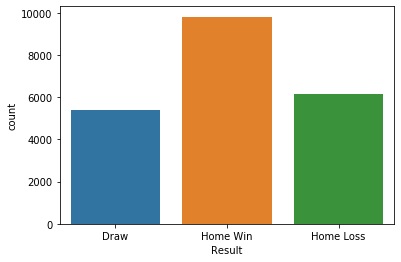

In [28]:
Match['Result'] = Match['Result'].replace([1,-1,0],['Home Win','Home Loss','Draw'])
sns.countplot(Match['Result'])
plt.show()
Match['Result'] = Match['Result'].replace(['Home Win','Home Loss','Draw'],[1,-1,0])

From the above graph we can conclude that the home team is very likely to win a fixture.

#### Player attributes EDA

In [29]:
Player_Attributes.describe()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,71615.000000,73059.000000,71615.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,71615.000000,73059.000000,71615.000000,73059.000000,71615.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000,71615.000000,73059.000000,73059.000000,73059.000000,71615.000000,73059.000000,73059.000000,73059.000000,73059.000000,73059.000000
mean,92100.370317,161336.039201,126788.151261,2011.340095,67.446584,72.692646,53.498597,48.237685,56.383676,60.791388,47.904741,56.990638,51.055072,47.552759,55.771308,61.556824,66.499008,66.925115,64.831963,64.981891,64.590337,59.841580,66.462291,65.908923,66.875963,51.380720,60.114469,51.990501,54.391040,57.200991,54.021407,46.490891,49.674783,47.513175,15.124434,17.611287,24.783586,17.683557,18.021298
std,53106.925473,56449.744436,133346.086777,2.907770,7.333027,6.778585,17.432631,19.202915,16.856317,14.633454,18.439440,18.045576,18.285628,17.825487,14.483485,15.540605,12.857347,12.548036,12.716214,9.379084,12.849754,16.499483,10.910055,13.162434,12.101084,18.491479,16.082722,19.043011,18.597577,14.929767,15.750907,21.272933,21.446403,21.687854,17.517688,16.341745,23.368241,16.539693,17.636146
min,1.000000,2.000000,2625.000000,2007.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,6.000000,13.000000,12.000000,11.000000,20.000000,12.000000,2.000000,14.000000,10.000000,18.000000,1.000000,8.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,46123.500000,148758.000000,33775.000000,2009.000000,63.000000,68.000000,43.000000,32.000000,48.000000,55.000000,33.000000,48.000000,39.000000,35.000000,47.000000,56.000000,60.000000,61.000000,58.000000,59.000000,58.000000,52.000000,60.000000,60.000000,60.000000,38.000000,50.000000,35.000000,43.000000,48.000000,44.000000,25.000000,28.000000,25.000000,7.000000,9.000000,9.000000,9.000000,9.000000
50%,91845.000000,179873.000000,68861.000000,2011.000000,67.000000,73.000000,57.000000,51.000000,59.000000,64.000000,50.000000,62.000000,53.000000,48.000000,58.000000,65.000000,68.000000,68.000000,66.000000,66.000000,66.000000,63.000000,67.000000,68.000000,68.000000,55.000000,63.000000,56.000000,58.000000,59.000000,56.000000,50.000000,55.000000,53.000000,10.000000,12.000000,12.000000,12.000000,12.000000
75%,138302.500000,198076.000000,181197.000000,2014.000000,72.000000,77.000000,66.000000,64.000000,68.000000,71.000000,63.000000,70.000000,65.000000,61.000000,66.000000,72.000000,75.000000,75.000000,74.000000,71.000000,73.000000,72.000000,74.000000,75.000000,75.000000,66.000000,72.000000,67.000000,68.000000,68.000000,66.000000,65.000000,68.000000,66.000000,13.000000,21.000000,47.000000,21.000000,21.000000
max,183977.000000,234141.000000,750584.000000,2016.000000,94.000000,97.000000,95.000000,97.000000,95.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,92.000000,97.000000,96.000000,96.000000


We  have player ratings in this dataframe, specific ratings highly depend on a player's position.

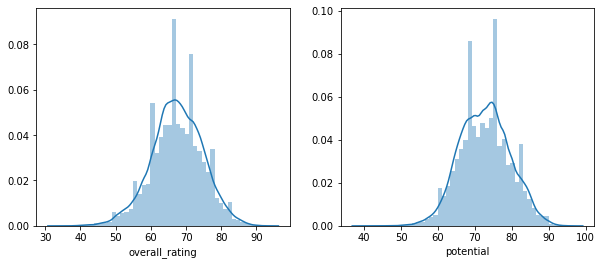

In [30]:
fig, ((ax1,ax2))=plt.subplots(ncols=2,nrows=1,figsize=(10,4))

sns.distplot(Player_Attributes['overall_rating'],ax=ax1);
sns.distplot(Player_Attributes['potential'],ax=ax2);

Analysis of players based upon their position and position specific attributes.

###### Goalkeepers

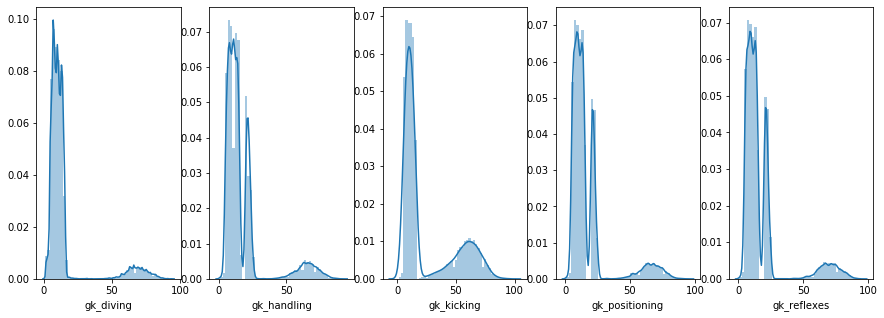

In [31]:
fig, ((ax1,ax2,ax3,ax4,ax5))=plt.subplots(ncols=5,nrows=1,figsize=(15,5))

sns.distplot(Player_Attributes['gk_diving'],ax=ax1);
sns.distplot(Player_Attributes['gk_handling'],ax=ax2);
sns.distplot(Player_Attributes['gk_kicking'],ax=ax3);
sns.distplot(Player_Attributes['gk_positioning'],ax=ax4);
sns.distplot(Player_Attributes['gk_reflexes'],ax=ax5);

##### Defenders

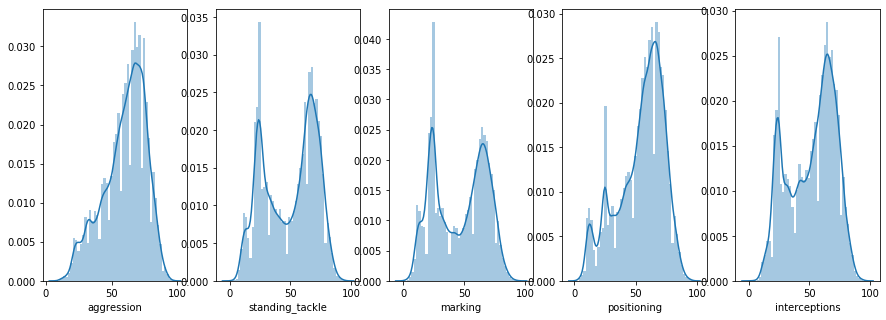

In [32]:
fig, ((ax1,ax2,ax3,ax4,ax5))=plt.subplots(ncols=5,nrows=1,figsize=(15,5))

sns.distplot(Player_Attributes['aggression'],ax=ax1);
sns.distplot(Player_Attributes['standing_tackle'],ax=ax2);
sns.distplot(Player_Attributes['marking'],ax=ax3);
sns.distplot(Player_Attributes['positioning'],ax=ax4);
sns.distplot(Player_Attributes['interceptions'],ax=ax5);

##### Midfielders

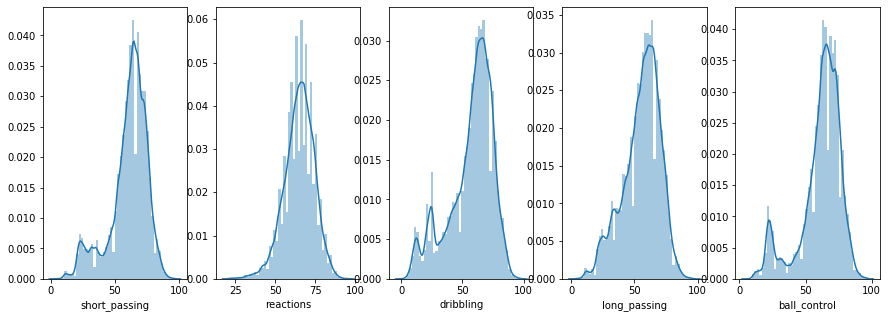

In [33]:
fig, ((ax1,ax2,ax3,ax4,ax5))=plt.subplots(ncols=5,nrows=1,figsize=(15,5))

sns.distplot(Player_Attributes['short_passing'],ax=ax1);
sns.distplot(Player_Attributes['reactions'],ax=ax2);
sns.distplot(Player_Attributes['dribbling'],ax=ax3);
sns.distplot(Player_Attributes['long_passing'],ax=ax4);
sns.distplot(Player_Attributes['ball_control'],ax=ax5);

##### Forwards

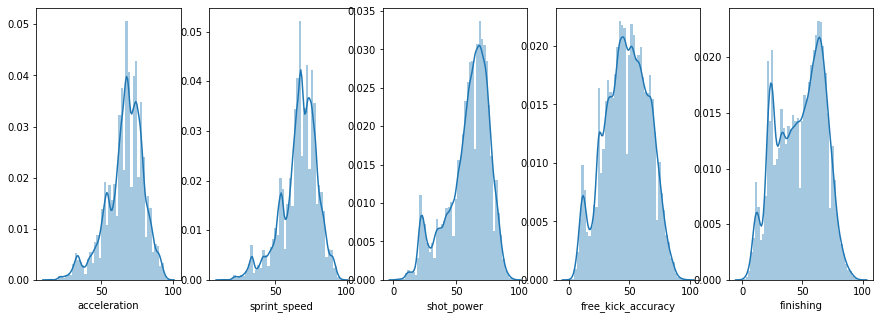

In [34]:
fig, ((ax1,ax2,ax3,ax4,ax5))=plt.subplots(ncols=5,nrows=1,figsize=(15,5))

sns.distplot(Player_Attributes['acceleration'],ax=ax1);
sns.distplot(Player_Attributes['sprint_speed'],ax=ax2);
sns.distplot(Player_Attributes['shot_power'],ax=ax3);
sns.distplot(Player_Attributes['free_kick_accuracy'],ax=ax4);
sns.distplot(Player_Attributes['finishing'],ax=ax5);

### Seprating player attributes in different data frames.  

As can be seen from the distribution of the features above. Some features have very similiar distributions thus including similiar features will not increase the predictive power of our model. Instead I choose certain position specific features instead.

Goalkeeper features: Overall rating & diving
Defender features: Overall rating, positioning, interceptions
Midfielder features: Overall rating, short passing
Striker: Overall rating, finishing, sprint speed

In [35]:
Player_Attributes_gk = Player_Attributes[['player_api_id','date','overall_rating','gk_diving']]

Player_Attributes_def = Player_Attributes[['player_api_id','date','overall_rating','positioning',\
                                           'interceptions']]

Player_Attributes_mid = Player_Attributes[['player_api_id', 'date', 'overall_rating', 'short_passing']]

Player_Attributes_str = Player_Attributes[['player_api_id', 'date', 'overall_rating', 'finishing','sprint_speed']]


Creating Player Attributes dataframes for certain time periods to merge on matches during those times.

    2008-2011
    2012-2014
    2015-2016

In [36]:
#Creating df's by year for goalkeepers
Player_Attributes_2008_2011_gk = Player_Attributes_gk[(Player_Attributes_gk['date']==2008) |
                                                      (Player_Attributes_gk['date']==2009) | 
                                                      (Player_Attributes_gk['date']==2010) | 
                                                      (Player_Attributes_gk['date']==2011)|
                                                     (Player_Attributes_gk['date']==2012)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])


Player_Attributes_2012_2014_gk = Player_Attributes_gk[(Player_Attributes_gk['date']==2012) |
                                                      (Player_Attributes_gk['date']==2013) | 
                                                      (Player_Attributes_gk['date']==2014) |
                                                      (Player_Attributes_gk['date']==2015) ].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])

    
Player_Attributes_2015_2016_gk = Player_Attributes_gk[(Player_Attributes_gk['date']==2014) |
                                                      (Player_Attributes_gk['date']==2015) |
                                                     (Player_Attributes_gk['date']==2016)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])


#Creating df's by year for defenders
Player_Attributes_2008_2011_def = Player_Attributes_def[(Player_Attributes_def['date']==2008) |
                                                      (Player_Attributes_def['date']==2009) | 
                                                      (Player_Attributes_def['date']==2010) | 
                                                      (Player_Attributes_def['date']==2011)|
                                                       (Player_Attributes_def['date']==2012)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])


Player_Attributes_2012_2014_def = Player_Attributes_def[(Player_Attributes_def['date']==2012) |
                                                      (Player_Attributes_def['date']==2013) | 
                                                      (Player_Attributes_def['date']==2014)|
                                                      (Player_Attributes_def['date']==2015)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])

                                                      
Player_Attributes_2015_2016_def = Player_Attributes_def[(Player_Attributes_def['date']==2014) |
                                                        (Player_Attributes_def['date']==2015) |
                                                        (Player_Attributes_def['date']==2016) ].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])


#Creating df's by year for mid
Player_Attributes_2008_2011_mid = Player_Attributes_mid[(Player_Attributes_mid['date']==2008) |
                                                      (Player_Attributes_mid['date']==2009) | 
                                                      (Player_Attributes_mid['date']==2010) | 
                                                      (Player_Attributes_mid['date']==2011)|
                                                       (Player_Attributes_mid['date']==2012)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])

Player_Attributes_2012_2014_mid = Player_Attributes_mid[(Player_Attributes_mid['date']==2012) |
                                                      (Player_Attributes_mid['date']==2013) | 
                                                      (Player_Attributes_mid['date']==2014) |
                                                       (Player_Attributes_mid['date']==2015)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])
                                                      
Player_Attributes_2015_2016_mid = Player_Attributes_mid[(Player_Attributes_mid['date']==2014) |
                                                      (Player_Attributes_mid['date']==2015) |
                                                       (Player_Attributes_mid['date']==2016)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])

#Creating df's by year for str
Player_Attributes_2008_2011_str = Player_Attributes_str[(Player_Attributes_str['date']==2008) |
                                                      (Player_Attributes_str['date']==2009) | 
                                                      (Player_Attributes_str['date']==2010) | 
                                                      (Player_Attributes_str['date']==2011)|
                                                        (Player_Attributes_str['date']==2012)].sort_values(by = 'date', ascending = False)\
                                                    .drop_duplicates(subset=['player_api_id'])

Player_Attributes_2012_2014_str = Player_Attributes_str[(Player_Attributes_str['date']==2012) |
                                                      (Player_Attributes_str['date']==2013) | 
                                                      (Player_Attributes_str['date']==2014) |
                                                       (Player_Attributes_str['date']==2014)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id']) 
                                                      
Player_Attributes_2015_2016_str = Player_Attributes_str[(Player_Attributes_str['date']==2014) |
                                                      (Player_Attributes_str['date']==2015)| 
                                                       (Player_Attributes_str['date']==2016)].sort_values(by = 'date', ascending = False)\
                                                        .drop_duplicates(subset=['player_api_id'])


Creating dataframes for certain time periods to merge onto Player Attributes for the same time period

In [38]:
Match.groupby('date_year_fin')

In [39]:
Match_2008_2011 = Match[(Match['date_year_fin']==2008)|(Match['date_year_fin']==2009)| (Match['date_year_fin']==2010)|
                       (Match['date_year_fin']==2011)]

Match_2012_2014 = Match[(Match['date_year_fin']==2012)| (Match['date_year_fin']==2013)| (Match['date_year_fin']==2014)]

Match_2015_2016  = Match[(Match['date_year_fin']==2015)| (Match['date_year_fin']==2016)]



Merging Player Attributes by position onto Match dataframes

Player 1: Goalkeeper

Player 2-5: Defender

Player 6-9: Midfielder

Player 10-11: Forwards

In [40]:
#2008 - #2011 
#Goalkeeper 
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_gk, how = 'left',left_on='home_player_1',right_on = 'player_api_id')
#Defenders
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='home_player_2',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='home_player_3',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='home_player_4',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='home_player_5',right_on = 'player_api_id')
#Midfielders
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='home_player_6',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='home_player_7',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='home_player_8',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='home_player_9',right_on = 'player_api_id')
#Forwards
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_str, how = 'left',left_on='home_player_10',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_str, how = 'left',left_on='home_player_11',right_on = 'player_api_id')


#Goalkeeper
Match_2008_2011 = Match_2008_2011.merge(Player_Attributes_2008_2011_gk, how = 'left',left_on='away_player_1',right_on = 'player_api_id')
#Defenders
Match_2008_2011 = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='away_player_2',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='away_player_3',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='away_player_4',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_def, how = 'left',left_on='away_player_5',right_on = 'player_api_id')
#Midfielders
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='away_player_6',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='away_player_7',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='away_player_8',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_mid, how = 'left',left_on='away_player_9',right_on = 'player_api_id')
#Forwards
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_str, how = 'left',left_on='away_player_10',right_on = 'player_api_id')
Match_2008_2011  = Match_2008_2011.merge(Player_Attributes_2008_2011_str, how = 'left',left_on='away_player_11',right_on = 'player_api_id')

In [41]:
#2012 - #2014 

#Goalkeeper 
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_gk, how = 'left',left_on='home_player_1',right_on = 'player_api_id')
#Defenders
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='home_player_2',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='home_player_3',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='home_player_4',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='home_player_5',right_on = 'player_api_id')
#Midfielders
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='home_player_6',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='home_player_7',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='home_player_8',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='home_player_9',right_on = 'player_api_id')
#Forwards
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_str, how = 'left',left_on='home_player_10',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_str, how = 'left',left_on='home_player_11',right_on = 'player_api_id')


#Goalkeeper 
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_gk, how = 'left',left_on='away_player_1',right_on = 'player_api_id')
#Defenders
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='away_player_2',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='away_player_3',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='away_player_4',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_def, how = 'left',left_on='away_player_5',right_on = 'player_api_id')
#Midfielders
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='away_player_6',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='away_player_7',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='away_player_8',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_mid, how = 'left',left_on='away_player_9',right_on = 'player_api_id')
#Forwards
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_str, how = 'left',left_on='away_player_10',right_on = 'player_api_id')
Match_2012_2014  = Match_2012_2014.merge(Player_Attributes_2012_2014_str, how = 'left',left_on='away_player_11',right_on = 'player_api_id')

In [42]:
#2015 - #2016

#Goalkeeper 
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_gk, how = 'left',left_on='home_player_1',right_on = 'player_api_id')

Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='home_player_2',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='home_player_3',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='home_player_4',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='home_player_5',right_on = 'player_api_id')
#Midfielders
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='home_player_6',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='home_player_7',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='home_player_8',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='home_player_9',right_on = 'player_api_id')
#Forwards
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_str, how = 'left',left_on='home_player_10',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_str, how = 'left',left_on='home_player_11',right_on = 'player_api_id')


#Goalkeeper 
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_gk, how = 'left',left_on='away_player_1',right_on = 'player_api_id')
#Defenders
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='away_player_2',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='away_player_3',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='away_player_4',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_def, how = 'left',left_on='away_player_5',right_on = 'player_api_id')
#Midfielders
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='away_player_6',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='away_player_7',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='away_player_8',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_mid, how = 'left',left_on='away_player_9',right_on = 'player_api_id')
#Forwards
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_str, how = 'left',left_on='away_player_10',right_on = 'player_api_id')
Match_2015_2016  = Match_2015_2016.merge(Player_Attributes_2015_2016_str, how = 'left',left_on='away_player_11',right_on = 'player_api_id')

In [43]:
Team_Attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [44]:
#Drop unnecessary columns:
Team_Attributes = Team_Attributes.drop(columns= (['id','team_fifa_api_id','buildUpPlaySpeedClass','buildUpPlayDribbling',\
                                                 'buildUpPlayPassingClass',\
                                                  'buildUpPlayPositioningClass','chanceCreationPassingClass',\
                                                  'chanceCreationCrossingClass','chanceCreationShootingClass',\
                                                  'chanceCreationPositioningClass','defencePressureClass',\
                                                  'defenceAggressionClass','defenceTeamWidthClass']))

In [45]:
#Encode categorical columns:

Team_Attributes = pd.get_dummies(Team_Attributes)

In [46]:
Team_Attributes = Team_Attributes.sort_values(by = 'date', ascending = False).drop_duplicates(subset=['team_api_id'])

#### Finally merging team attribute with match dataframe

In [47]:
Match_2008_2011 = Match_2008_2011.merge(Team_Attributes, how = 'left',left_on='home_team_api_id',right_on = 'team_api_id')
Match_2008_2011 = Match_2008_2011.merge(Team_Attributes, how = 'left',left_on='away_team_api_id',right_on = 'team_api_id')
 
Match_2012_2014 = Match_2012_2014.merge(Team_Attributes, how = 'left',left_on='home_team_api_id',right_on = 'team_api_id')
Match_2012_2014 = Match_2012_2014.merge(Team_Attributes, how = 'left',left_on='away_team_api_id',right_on = 'team_api_id')

Match_2015_2016 = Match_2015_2016.merge(Team_Attributes, how = 'left',left_on='home_team_api_id',right_on = 'team_api_id')
Match_2015_2016 = Match_2015_2016.merge(Team_Attributes, how = 'left',left_on='away_team_api_id',right_on = 'team_api_id')

In [48]:
Train_range = [Match_2008_2011,Match_2012_2014]
Test_range =  [Match_2015_2016]

Match_Train = pd.concat(Train_range)
print(f'Training dataframe shape before dropping null values: {Match_Train.shape}')

Match_Test = pd.concat(Test_range)
print(f'Test dataframe shape before dropping null values: {Match_Test.shape}')

Match_Train = Match_Train.dropna()
Match_Test = Match_Test.dropna()

print(f'Training dataframe shape after dropping null values: {Match_Train.shape}')
print(f'Test dataframe shape after dropping null values: {Match_Test.shape}')

Training dataframe shape before dropping null values: (16848, 168)
Test dataframe shape before dropping null values: (4526, 168)
Training dataframe shape after dropping null values: (16636, 168)
Test dataframe shape after dropping null values: (4413, 168)


we will use grid search CV to minimise overfitting of our models and to find the best parameters.For gridSearch CV we need to Get X and y from the train and tests.

In [92]:
#Dropping unncessary columns to select features to be fed into model:

#Features and labels are after Result column
Train = (Match_Train.iloc[:,Match_Train.columns.get_loc('Result'):]).drop(['player_api_id_x','date_y',\
                                                                             'player_api_id_y','date_x',\
                                                                            'team_api_id_x','team_api_id_y',\
                                                                             'date'],1)


Test = (Match_Test.iloc[:,Match_Test.columns.get_loc('Result'):]).drop(['player_api_id_x','date_y',\
                                                                             'player_api_id_y','date_x',\
                                                                            'team_api_id_x','team_api_id_y',\
                                                                             'date'],1)

print(f'Training dataframe shape after dropping unncessary columns: {Train.shape}')
print(f'Testing dataframe shape after dropping unncessary columns: {Test.shape}')

Training dataframe shape after dropping unncessary columns: (16636, 90)
Testing dataframe shape after dropping unncessary columns: (4413, 90)


In [93]:

x_train = Train.iloc[:,1:]
y_train = Train.iloc[:,0]
x_test = Test.iloc[:,1:]
y_test = Test.iloc[:,0]


#### Logisitic Regression:
Create a Feature Union object for preprocessing.

Create a Pipeline object with a preprocess attribute and a classifier attribute.

Create a dictionary with the keys as the objects previously created and the items as the attributes for the search space during grid search.

Create a grid search object.

In [112]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.externals import joblib
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [98]:
# Create a preprocessing object that includes StandardScaler features and PCA

preprocess = FeatureUnion([("std", StandardScaler()), ("pca", PCA()),("F_value",SelectKBest(f_classif) )])

 # Create a pipeline
    
pipe = Pipeline([("preprocess", preprocess),
                  ("classifier", LogisticRegression())])

  # Create space of candidate values
search_space = [{"preprocess__pca__n_components": [85,80],
                   "preprocess__F_value__k": [80,85],
                   "classifier__penalty": [ "l1","l2"],
                   "classifier__C": np.logspace(-3, 2, 10)}]

 # Create grid search
log_test_1 = GridSearchCV(pipe, search_space, cv=5, verbose=1, n_jobs=-1)

 #Fit the grid search
log_test_1.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.9min finished
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        FeatureUnion(n_jobs=None,
                                                     transformer_list=[('std',
                                                                        StandardScaler(copy=True,
                                                                                       with_mean=True,
                                                                                       with_std=True)),
                                                                       ('pca',
                                                                        PCA(copy=True,
                                                                            iterated_power='auto',
                                                                            n_components=None,
                                                       

In [99]:
print(f'Logistic Regression grid search best parameters: {log_test_1.best_params_}')

print(f'Logistic Regression grid search best cross validation score: {log_test_1.best_score_}')

Logistic Regression grid search best parameters: {'classifier__C': 0.5994842503189409, 'classifier__penalty': 'l2', 'preprocess__F_value__k': 85, 'preprocess__pca__n_components': 80}
Logistic Regression grid search best cross validation score: 0.5409955658539687


In [100]:

estimators = [('normalise',StandardScaler()),
                ('logit', LogisticRegression(C= 0.001,solver='lbfgs'))]

pipe_2 = Pipeline(estimators)

pipe_2.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('normalise',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logit',
                 LogisticRegression(C=0.001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

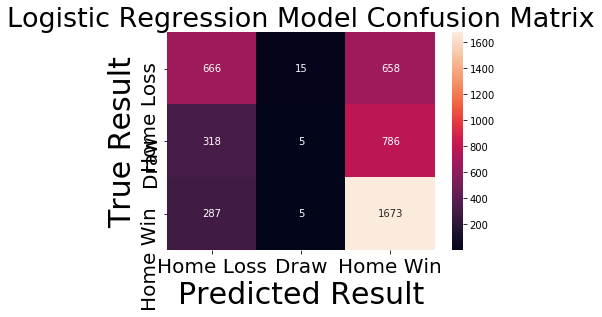

<Figure size 1152x648 with 0 Axes>

In [102]:
ax = plt.subplot();
confusion_log = confusion_matrix(y_test, pipe_2.predict(x_test))
plt.figure(figsize=(16,9));
sns.heatmap(confusion_log,annot =True,fmt='g',ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted Result',fontsize=30);ax.set_ylabel('True Result',fontsize=30); 
ax.set_title('Logistic Regression Model Confusion Matrix',fontsize=27); 
ax.xaxis.set_ticklabels(['Home Loss','Draw','Home Win'],fontsize=20); 
ax.yaxis.set_ticklabels(['Home Loss','Draw','Home Win'],fontsize=20);
plt.show();


#### SVM

In [104]:
# Create a preprocessing object that includes StandardScaler

preprocess = FeatureUnion([("std", StandardScaler())])
    
pipe = Pipeline([("preprocess", preprocess),
                  ("classifier", SVC())])

# Create space of candidate values
search_space = [{"classifier__kernel": ["poly","rbf","sigmoid"],
                  "classifier__gamma": np.logspace(-9, 3, 13),
                  "classifier__C": np.logspace(-3, 3, 10)}]

# Create grid search
SVM_test2 = GridSearchCV(pipe, search_space, cv=2, verbose=1, n_jobs=-1)

SVM_test2.fit(x_train,y_train)

Fitting 2 folds for each of 390 candidates, totalling 780 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 780 out of 780 | elapsed: 123.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        FeatureUnion(n_jobs=None,
                                                     transformer_list=[('std',
                                                                        StandardScaler(copy=True,
                                                                                       with_mean=True,
                                                                                       with_std=True))],
                                                     transformer_weights=None,
                                                     verbose=False)),
                                       ('classifier',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
        

In [107]:
print(f'(SVM best parameters after grid search: {SVM_test2.best_params_}')
print(SVM_test2.best_score_)

(SVM best parameters after grid search: {'classifier__C': 46.41588833612773, 'classifier__gamma': 1e-05, 'classifier__kernel': 'rbf'}
0.5416566482327483


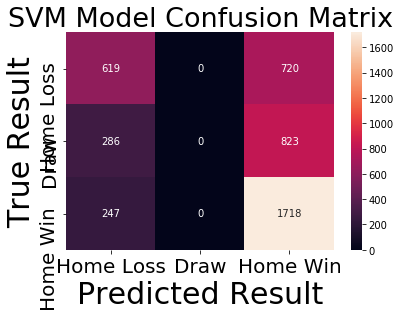

<Figure size 1152x648 with 0 Axes>

In [106]:

ax= plt.subplot();
confusion_svm = confusion_matrix(y_test, SVM_test2.predict(x_test))
plt.figure(figsize=(16,9));
sns.heatmap(confusion_svm,annot =True,fmt='g',ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted Result',fontsize=30);ax.set_ylabel('True Result',fontsize=30);  
ax.set_title('SVM Model Confusion Matrix',fontsize=27); 
ax.xaxis.set_ticklabels(['Home Loss','Draw','Home Win'],fontsize=20); ax.yaxis.set_ticklabels(['Home Loss','Draw','Home Win'],fontsize=20);
plt.show();

In [114]:
# Create a preprocessing object that includes StandardScaler

preprocess = FeatureUnion([("std", StandardScaler())])
    
pipe = Pipeline([("preprocess", preprocess),("classifier", RandomForestClassifier())])
# Create space of candidate values
search_space = [{
                'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                'classifier__max_features': ['auto', 'sqrt'],
                'classifier__min_samples_leaf': [1, 2, 4],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}]
# Create grid search
RF_test3 = RandomizedSearchCV(pipe, search_space, cv=10, verbose=1, n_jobs=-1)

RF_test3.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 25.2min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocess',
                                              FeatureUnion(n_jobs=None,
                                                           transformer_list=[('std',
                                                                              StandardScaler(copy=True,
                                                                                             with_mean=True,
                                                                                             with_std=True))],
                                                           transformer_weights=None,
                                                           verbose=False)),
                                             ('classifier',
                                              RandomForestClassifier(bootstrap=True,
                                                           

In [115]:
print(f'(Random Forest Classifier best parameters after Randomize search: {RF_test3.best_params_}')
print(RF_test3.best_score_)

(Random Forest Classifier best parameters after Randomize search: {'classifier__n_estimators': 600, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'auto', 'classifier__max_depth': 50}
0.5422583650376983


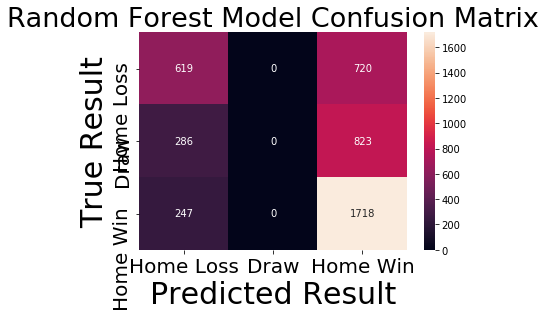

<Figure size 1152x648 with 0 Axes>

In [116]:
ax= plt.subplot();
confusion_rf = confusion_matrix(y_test, RF_test3.predict(x_test))
plt.figure(figsize=(16,9));
sns.heatmap(confusion_svm,annot =True,fmt='g',ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted Result',fontsize=30);ax.set_ylabel('True Result',fontsize=30);  
ax.set_title('Random Forest Model Confusion Matrix',fontsize=27); 
ax.xaxis.set_ticklabels(['Home Loss','Draw','Home Win'],fontsize=20); ax.yaxis.set_ticklabels(['Home Loss','Draw','Home Win'],fontsize=20);
plt.show();

#### Model Evaluation

In [117]:
log_test_1.score(x_test, y_test)

0.5268524813052345

In [118]:
SVM_test2.score(x_test, y_test)

0.5295717199184229

In [119]:
RF_test3.score(x_test, y_test)

0.5263992748697032

All these models have nearly the same accuracy.

In [120]:
import pickle

In [121]:
file = open('C:\\Users\\user\\football_predictor_rf.pkl', 'wb')

# dump information to that file
pickle.dump(RF_test3, file)

file = open('C:\\Users\\user\\football_predictor_svm.pkl', 'wb')

# dump information to that file
pickle.dump(SVM_test2, file)

file = open('C:\\Users\\user\\football_predictor_logreg.pkl', 'wb')

# dump information to that file
pickle.dump(log_test_1, file)